In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re


from skimage.io import imread

from scipy.ndimage import convolve

from collections import Counter


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

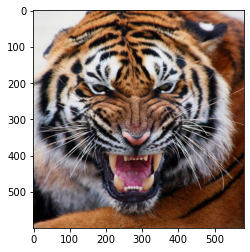

In [26]:
tiger = imread("data/tiger.jpg")
plt.imshow(tiger)
plt.show()

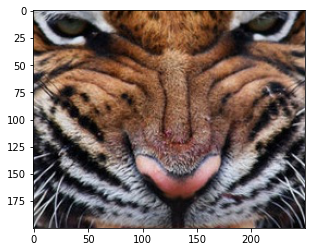

In [4]:
plt.imshow(tiger[200:400,150:400])
plt.show()

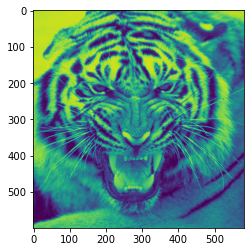

In [5]:
plt.imshow(tiger[:,:,0])
plt.show()

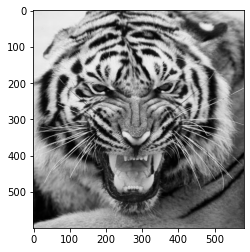

In [6]:
plt.imshow(tiger[:,:,0], cmap="gray")
plt.show()

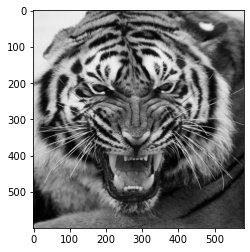

In [27]:
tiger_red = tiger[:,:,0]
tiger_green = tiger[:,:,1]
tiger_blue = tiger[:,:,2]
tiger_grayscale = 0.299 * tiger_red + 0.587 * tiger_green + 0.114 * tiger_blue 
plt.imshow(tiger_grayscale, cmap="gray") #Общо възприето черно-бяло изображение

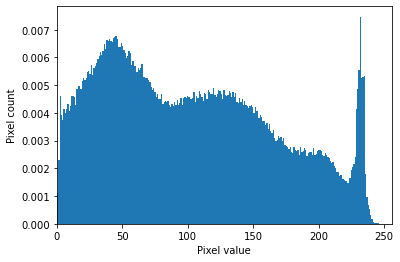

In [8]:
plt.hist(tiger_grayscale.ravel(), bins=256, density=True)  #ravel() прави многомерен масив едномерен  

plt.xlim(0,256)

plt.xlabel("Pixel value")
plt.ylabel("Pixel count")

plt.show()

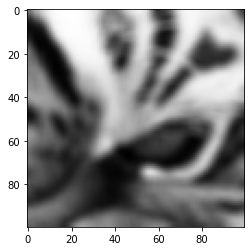

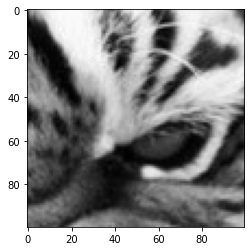

In [9]:
#За blurr-ване
conv_filter = np.ones((5,5)) / 25
blurred = convolve(tiger_grayscale[150:250, 300:400], conv_filter)
plt.imshow(blurred, cmap="gray")
plt.show()
plt.imshow(tiger_grayscale[150:250, 300:400], cmap="gray")
plt.show()

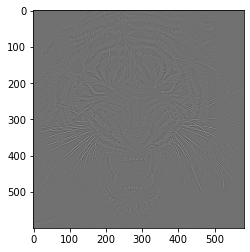

In [10]:
edge_detector = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]]) 
edges = convolve(tiger_grayscale, edge_detector)

plt.imshow(edges, cmap='gray')
plt.show()

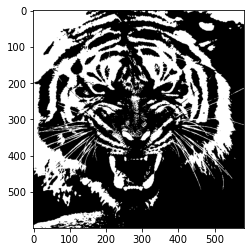

In [11]:
tiger_binary = tiger_grayscale.copy()
threshold = 128
tiger_binary[tiger_binary <= threshold] = 0
tiger_binary[tiger_binary > threshold] = 256

plt.imshow(tiger_binary, cmap="gray")
plt.show()

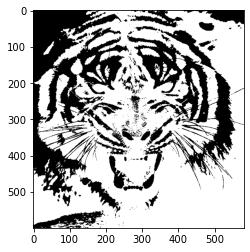

In [12]:
plt.imshow(255- tiger_binary, cmap="gray")
plt.show()

In [13]:
with open("data/alice.txt", "r", encoding="utf-8") as file:
    alice = file.read()

In [14]:
alice_words = [word for word in re.split("\W", alice) if word != ""]
alice_counter = Counter(alice_words)

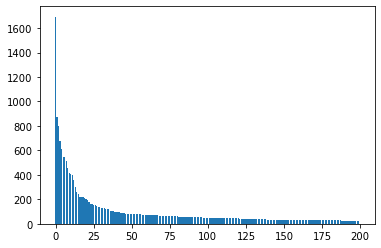

In [15]:
alice_common_counts = [pair[1] for  pair in alice_counter.most_common(200)] 
plt.bar(range(len(alice_common_counts)), alice_common_counts)
plt.show()

In [16]:
Counter(alice).most_common(10)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481)]

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aenlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
english_stopwords = set(stopwords.words("english"))
#english_stopwords

In [19]:
alice_words_clean = [word.lower() for word in alice_words if word.lower() not in english_stopwords]
#Counter(alice_words_clean).most_common()

In [20]:
alice_words_stems = [PorterStemmer().stem(word) for word in alice_words_clean]
Counter(alice_words_stems).most_common()

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70),
 ('get', 68),
 ('think', 64),
 ('king', 64),
 ('well', 63),
 ('turtl', 62),
 ('way', 60),
 ('head', 60),
 ('come', 58),
 ('began', 58),
 ('mock', 57),
 ('hatter', 57),
 ('tm', 57),
 ('use', 55),
 ('much', 55),
 ('quit', 55),
 ('gryphon', 55),
 ('rabbit', 54),
 ('must', 54),
 ('first', 51),
 ('voic', 51),
 ('make', 50),
 ('cat', 50),
 ('never', 48),
 ('1', 46),
 ('oh', 45),
 ('tri', 45),
 ('got', 45),
 ('mous', 44),
 ('turn', 42),
 ('duchess', 42),
 ('tone', 42),
 ('round', 41),
 ('seem', 40),
 ('came', 40),
 ('back', 40),
 ('two', 40),
 ('dormous', 40),
 ('great', 39),
 ('white', 38),
 ('day', 37),
 ('eye', 37),
 ('last', 36),
 ('long', 36),
 ('right', 36),
 ('hand', 36),
 ('

In [21]:
vectorizer = TfidfVectorizer(input = "content", analyzer = "word",
    ngram_range = (1, 1), min_df = 0, stop_words = english_stopwords, sublinear_tf = True)


In [22]:
newsgroups = fetch_20newsgroups()

In [23]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [24]:
vectorized_data = vectorizer.fit_transform(newsgroups.data)